# Module 11: Introduction to Causal Inference Part 2

# Introduction

In the previous module, we presented a general introduction to causal modeling and inference.

In this module, we will develop more formal definitions of the fundamental causal patterns (i.e. the chain, fork, and collider), demonstrate how to find patterns in datasets of observations, and discuss how to properly control for confounders. 

# Learning Outcomes

In this module, you will learn the basics of causal inference. 

By the end of this module, you will be able to:

* Identify dependencies and independencies induced by the three building block structures of a causal network
* Adjust for confounders

# Reading and Resources

We invite you to further supplement this notebook with the following recommended texts:

- Pearl, J., Mackenzie, D., (2018). *The Book of Why. The New Science of Cause and Effect*. Basic Books.


- Pearl, J., Glymour, M., Jewell, N. P., (2016). *Causal Inference in Statistics: A Primer.* Wiley.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-11:-Introduction-to-Causal-Inference-Part-2" data-toc-modified-id="Module-11:-Introduction-to-Causal-Inference-Part-2">Module 11: Introduction to Causal Inference Part 2</a></span>
</li>
<li><span><a href="#Introduction" data-toc-modified-id="Introduction">Introduction</a></span>
</li>
<li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes">Learning Outcomes</a></span>
</li>
<li><span><a href="#Reading-and-Resources" data-toc-modified-id="Reading-and-Resources">Reading and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Overview" data-toc-modified-id="Overview">Overview</a></span>
</li>
<li><span><a href="#Chains" data-toc-modified-id="Chains">Chains</a></span>
</li>
<li><span><a href="#Forks" data-toc-modified-id="Forks">Forks</a></span>
<ul class="toc-item">
<li><span><a href="#Controlling-confounders" data-toc-modified-id="Controlling-confounders">Controlling confounders</a></span>
</li>
<li><span><a href="#Simpson's-paradox" data-toc-modified-id="Simpson's-paradox">Simpson's paradox</a></span>
</li>
</ul>
</li>
<li><span><a href="#Colliders" data-toc-modified-id="Colliders">Colliders</a></span>
</li>
<li><span><a href="#Multiple-Regression-and-Causality" data-toc-modified-id="Multiple-Regression-and-Causality">Multiple Regression and Causality</a></span>
<ul class="toc-item">
<li><span><a href="#d-separation" data-toc-modified-id="d-separation">d-separation</a></span>
</li>
</ul>
</li>
<li><span><a href="#Interventions-vs.-observational-studies" data-toc-modified-id="Interventions-vs.-observational-studies">Interventions vs. observational studies</a></span>
<ul class="toc-item">
<li><span><a href="#The-effect-of-interventions" data-toc-modified-id="The-effect-of-interventions">The effect of interventions</a></span>
</li>
<li><span><a href="#The-adjustment-formula" data-toc-modified-id="The-adjustment-formula">The adjustment formula</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Overview

In the previous module, we saw examples of spurious correlation, i.e. correlation by "accident." Such accidental correlations are not really surprising &mdash; if you pick any two variables in a dataset (or generate two vectors of random numbers) and compute their correlation, you won't get exactly 0.  Spurious correlations can arise just from random chance or a number of other reasons we'll explore.  Most correlations do not indicate causal relationships.

We would like to have tools for distinguishing mere association from evidence of causation. If we're doing multiple regression, when more than one predictor variable is used to model an outcome, we can come to false conclusions unless we have insight into:

- **Confounders**: Anything that might mislead us when trying to do causal inference.


- **Multiple and complex causation**: A phenomenon may arise as a result of multiple simultaneous causes, and those causes can cascade in complex ways.


- **Interactions**: The importance of one variable may depend upon another. For example, plants benefit from both light and water. But in the absence of either of them, the other is of no benefit. 

Our focus here will be on how causal analysis can be used to identify confounders and possibly allow us to adjust for their effects.

But first, we need to more carefully define the building block patterns of causal models (or, more formally, structural causal models) that we introduced in the last module i.e. chains, forks, and colliders.

# Chains

We may think of causal models as representations of the causal story underlying data. Another way to think of this is that causal models represent the mechanism by which some dataset was generated.

Let's consider the following hypothetical **structural causal model** (SCM), which represents the causal relationships between a high school's funding ($X$), its average SAT score ($Y$), and its college acceptance rate ($Z$) for a given year. These are three variables which we can observe and determine if there are causal relationships between them.  These are called _endogenous_ variables. Conversely, _exogenous_ variables stand for any unknown or random effects that may alter the relationship between observed variables.

In our example, we can expect that:

1. $Z$ and $Y$ are dependent. The higher the average SAT score, the better the college acceptance rate. $P(Z=z|Y=y) \neq P(Z=z)$<br><br>

2. $Y$ and $X$ are dependent. The better the funding, the higher the school's average SAT scores. $P(Y=y|X=x) \neq P(Y=y)$.<br><br>

3. $Z$ and $X$ are likely dependent. Better funding should result in better acceptance rates. $P(Z=z|X=x) \neq P(Z=z)$.<br><br>

4. $Z$ and $X$ are independent, conditional on $Y$. If we already know the average SAT score for a school, then also knowing the funding shouldn't give us any better idea of the acceptance rate than we already have. $P(Z=z|X=x, Y=y) = P(Z=z|Y=y)$

Note that these conclusions are based on our understanding of how the world works causally, not just on what we might have observed as correlations in the data.

We can draw this as an SCM:


$$X \rightarrow Y \rightarrow Z$$


There might be a number of exogenous variables (unknown $U_{X}$'s) that determine the value of variable $X$ (the school's funding) but we don't know what they are so we leave them out of the model and consider them to be what makes $X$ a random variable rather than a simple variable like any other in mathematics.

To do anything with $X$ as a random variable, we will need to understand its distribution, which we can find by collecting data or by specifying it if we know it has a particular form. In this example, we have a _chain_ diagram: $X$ causes $Y$, which means that you can think of $Y$ as being a function of $X$ (plus some noise caused by the $U_{X}$'s). We can see also that $Y$ causes $Z$. Similarly, $Z$ must be a function of $Y$ (plus again some random variation from unknown $U_{Z}$ factors). So it is likely that $Z$ is also dependent on $X$ (because it is functionally dependent on $Y$, which is functionally dependent on $X$).

We've covered off rules 1 through 3 above. Rule 4 is very important here. If we condition on $Y$, the variables $X$ and $Z$ become independent, as if we've broken the chain by filtering out messages between $X$ and $Z$ other than those with given values of $Y$.  For a fixed value of SAT score, changing the funding level would not affect the college acceptance rate.

# Forks

Another common pattern is when a variable $X$ causes both $Y$ and $Z$. In this case the variable $X$ is a confounder:

$$Y \leftarrow X \rightarrow Z$$

We saw in the last module that this pattern is known as a fork. In this case the dependence is opposite to what we saw with chains: $Y$ and $Z$ are likely actually independent, but they could have an apparent dependence brought about by the confounder $X$. We find that when we condition on $X$ these two otherwise dependent variables suddenly become independent.

For this graphical model we have the following dependencies and independencies:

1. $X$ and $Y$ are dependent: $P(X=x|Y=y) \neq P(X=x)$<br><br>

2. $X$ and $Z$ are dependent: $P(X=x|Z=z) \neq P(X=x)$<br><br>

3. $Z$ and $Y$ are likely dependent: $P(Z=z|Y=y) \neq P(Z=z)$<br><br>

4. $Y$ and $Z$ are independent, conditional on $X$: $P(Y=y|Z=z,X=x) = P(Y=y|X=x)$



## Controlling confounders

Suppose we are interested in the potential outcome of some medical treatment.  Let's say $E(Y_{1} -Y_{0})$ is the mean difference of the outcome when everyone was treated versus no one was treated. If the chance of getting selected for the treatment is higher if you're sick, then the sicker patients are more likely to be treated. But these patients are likely at higher risk of a bad outcome. Doing the selection this way would introduce a confounder, where the severity of disease affects both treatment assignment and potential outcome. We should control for variables impacting health for our patients, such as their history of various diseases, age, weight, smoking, alcohol use, etc.

We will see soon that the situation is different with colliders, where controlling the wrong variable can lead to wrong results. But first, let's look at another famous example of a confounder at work: Simpson's paradox.

## Simpson's paradox

Simpson's paradox refers to the existence of data in which a statistical association that holds for an entire population is _reversed_ in every subpopulation. For example, we might discover that students who smoke get higher grades, on average, than non-smokers get. But, when we take into account the student's age, we might find that in every age group, smokers get lower grades that non-smokers. Then, if we take into account both age and income, we might discover the smokers once again get _higher_ grades than non-smokers of the same age and income.

In the classical example used by Simpson (1951), a group of sick patients were given the option to try a new drug. Among those who took the drug, a lower percentage recovered than among those who did not. The drug appeared to be a failure.

However, when we partition by gender, we see that _more_ men taking the drug recover than do men not taking the drug.  We also find _more_ women taking the drug recover than women not taking it. It seems nonsensical, the data seems to say that if we know the patient's gender &mdash; male or female &mdash; we can prescribe the drug, but if the gender is unknown we should not!

||Drug|No drug|
|:---|:---|:---|
|Men|81 out of 87 recovered (93%)|234 out of 270 recovered (87%)|
|Women|192 out of 263 recovered (73%)|55 out of 80 recovered (69%)|
|Combined Data|273 out of 350 recovered (78%)|289 out of 350 recovered (83%)|

To find out whether the drug is any good and solve this puzzle, we have to understand the story behind the data &mdash; the *causal* mechanism that led to the results we see. For instance, suppose we knew an additional fact: Estrogen has a negative effect on recovery, so women are less likely to recover than men, regardless of the drug. In addition, as we see from the data women are significantly _more_ likely to take the drug than men are. So, the reason the drug appears to be harmful overall is that, if we select a user at random, that user is more likely to be a woman and hence less likely to recover than a random person who does not take the drug. (The data in the table show that we had far more female volunteers than men and they more often fail to recover). If the patient had been selected randomly, i.e. if we had an equal probability to choose male or female, we would have $P(drug)= \frac{1}{2} 0.93 + \frac{1}{2} 0.73 = 0.83$ vs. $\frac{1}{2} 0.87 + \frac{1}{2} 0.69 = 0.78$ without.

The same reversal can occur in a continuous example. Consider a study that measures weekly exercise and cholesterol in various age groups. When we plot exercise on the X-axis and cholesterol on the Y-axis and segregate by age, we see that there is a general trend downward in each group &mdash; the more young people exercise, the lower their cholesterol is, and the same applies to the middle-aged people and the elderly. However, the same graph shows a general upward trend and if we don't segregate by age we shall find the opposite &mdash; the more a person exercises, the higher their cholesterol is. It's just that older people exercise more and have higher cholesterol on average. Here, age is the common cause.

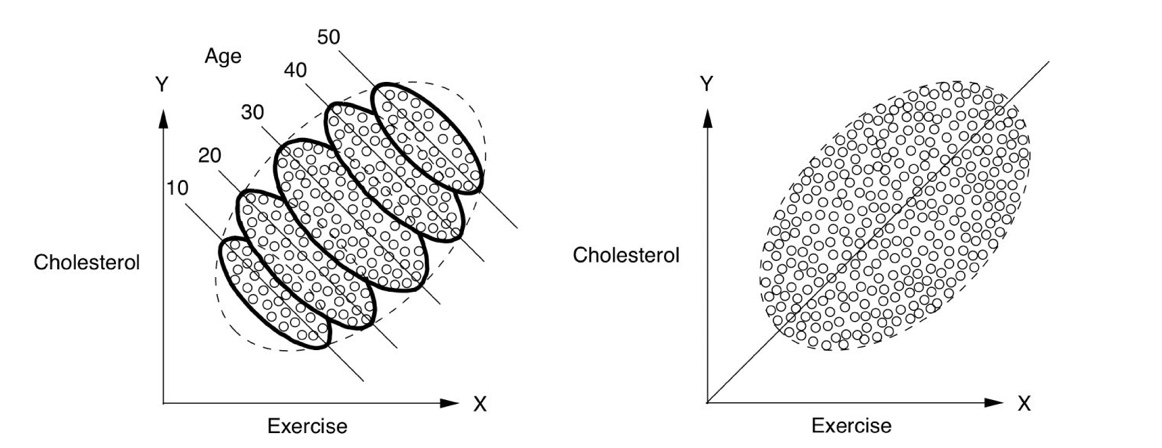



# Colliders

We have described two of the simple configurations that can occur on a path between variables: chains and forks. The third such configuration contains a *collider* node, and it occurs when one node receives edges from two other nodes. Here is the simplest graphical causal model containing a collider, representing a common effect, $Z$, of two causes $X$ and $Y$.

$$ X \rightarrow Z \leftarrow Y$$

This model can be described as follows:

1. $X$ and $Z$ are dependent: $P(X=x | Z=z) \neq P(X=x)$<br><br>

2. $Y$ and $Z$ are dependent: $P(Y=y | Z=z) \neq P(Y=y)$<br><br>

3. $X$ and $Y$ are independent. For all $x, y, P(X=x | Y=y) = P(X=x)$<br><br>

4. $X$ and $Y$ are dependent conditional on Z: $P(X=x | Y=y, Z = z) \neq P(X=x | Z=z)$.

The first two points reflect the causal relationship in this model. The last point is rather counterintuitive. What would be the reason for two *independent* variables $X$ and $Y$ to become *dependent* when conditioned on their common effect? 

When we condition on $Z$, we select a subset of cases in which $Z$ takes the same value. Since $Z$ depends on both $X$ and $Y$, in the subset with the fixed value of $Z$, any change in the value of $X$ must be compensated by a change in the value of $Y$, otherwise, the value of $Z$ would change as well. This is the main attribute of colliders: conditioning on a collision node produces a dependence between the node's parents. 

**Example 1**

Consider the most basic situation $Z = X + Y$ where $X$ and $Y$ are independent variables. If we know that $X=3$ we cannot say anything about value of $Y$. However, if we know the outcome $Z = 10$, then learning about $X = 3$ immediately tells us that $Y$ must be 7. Thus, $X$ and $Y$ are dependent, given that $Z=10$.

**Example 2** 

Suppose that a research grant agency reviews applications and they need to select the most interesting research proposals and the ones that promise reliable results. In this case, it can be shown that the act of selection itself is enough to make the most newsworthy studies the least trustworthy.

Let's imagine the grant agency receives 200 research proposals. There is no correlation at all to begin with between trustworthiness (rigor, plausibility of success) and newsworthiness (social value, public interest). The panel weighs trustworthiness and newsworthiness equally and ranks the proposals by their combined scores. Then, they select the top 10%. Let's see what happens.

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

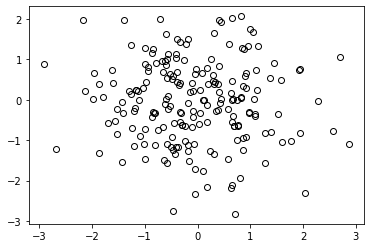

In [2]:
N = 200
mu, s = 0, 1
np.random.seed(1000)
# Generate random values for proposals' newsworthiness nw and trustworthiness tw:
nw = np.random.normal(mu, s, N)
tw = np.random.normal(mu, s, N)

plt.plot(nw, tw, 'o', color='black', fillstyle='none')

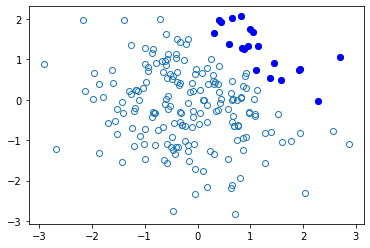

In [3]:
# Lets find the combined score for each proposal:
s = nw + tw

# To select the top 10% we need to find the combined score value for the 90th percentile:
th = np.percentile(s, 90)

# Select proposals with combined scores s larger than the threshold th (s > th):
nw_selected = nw[s > th]
tw_selected = tw[s > th]

plt.plot(nw, tw, 'o', fillstyle='none')
plt.plot(nw_selected, tw_selected, 'o', color='blue')

In [4]:
# correlation among selected proposals:
np.corrcoef(nw_selected, tw_selected)

array([[ 1.        , -0.74188103],
       [-0.74188103,  1.        ]])

In [5]:
# Correlation between 'nw' and 'tw' for general proposal before selection:
np.corrcoef(nw, tw)

array([[ 1.        , -0.05795225],
       [-0.05795225,  1.        ]])

The selected combined-score proposals ($S$) are shown with filled circles in the right upper corner of the scatter plot. You should be able to see by inspection that there appears to be a negative correlation between newsworthiness ($N$) and trustworthiness ($T$). The correlation coefficient is -0.74, while for proposals in general the correlation is close to zero. The strategy to value both `nw` and `tw` equally resulted in the most newsworthy having less than average trustworthiness and the most trustworthy having less than average newsworthiness.

$$T \rightarrow S \leftarrow N$$

This phenomenon is sometimes called **Berkson's paradox** or the **selection-distortion effect**. 

# Multiple Regression and Causality

Next, we'll use Python to help us analyze a divorce rate dataset and discover apparent correlations which a causal model can help us to make sense of.

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
d = pd.read_csv('waffledivorce.csv')

d.head(5)

,Unnamed: 0,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,1,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,2,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,3,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,4,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,5,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


In [9]:
d.describe()

,Unnamed: 0,Population,MedianAgeMarriage,Marriage,Marriage.SE,Divorce,Divorce.SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
count,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01,50.000000
mean,25.50000,6.119600,26.05400,20.114000,1.399400,9.688000,0.961800,32.340000,0.280000,79378.340000,6.287293e+05,0.094051
std,14.57738,6.876156,1.24363,3.797905,0.796975,1.820814,0.525367,65.789587,0.453557,149730.921149,7.813127e+05,0.174449
min,1.00000,0.560000,23.20000,13.500000,0.390000,6.100000,0.240000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,13.25000,1.635000,25.32500,17.125000,0.810000,8.300000,0.572500,0.000000,0.000000,0.000000,4.332100e+04,0.000000
50%,25.50000,4.435000,25.90000,19.700000,1.185000,9.750000,0.795000,1.000000,0.000000,0.000000,4.077220e+05,0.000000
75%,37.75000,6.677500,26.75000,22.100000,1.767500,10.900000,1.257500,39.750000,1.000000,80828.000000,9.209770e+05,0.085000
max,50.00000,37.250000,29.70000,30.700000,3.920000,13.500000,2.500000,381.000000,1.000000,490865.000000,3.880735e+06,0.570000


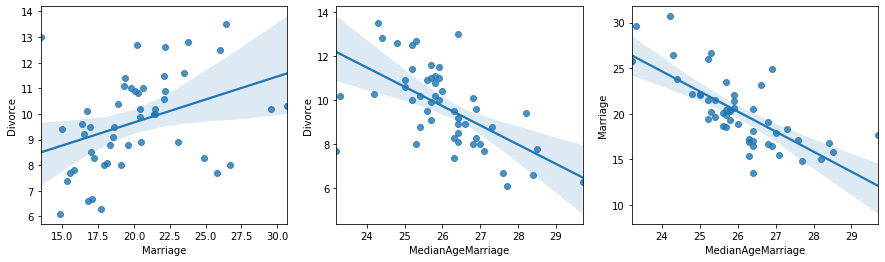

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
fig.set_figwidth(15)
ax1 = sns.regplot(x=d.Marriage, y=d.Divorce, ax=ax1)
ax2 = sns.regplot(x=d.MedianAgeMarriage, y=d.Divorce, ax=ax2)
ax3 = sns.regplot(x=d.MedianAgeMarriage, y= d.Marriage)

Here we see the correlation between the divorce and marriage rates, defined as the number of each per 1,000 adults. 
The middle graph shows a negative association between divorce rate and the median age at marriage. The right also shows a negative association between marriage rate and median age at marriage. There is no way to tell from a plot whether any of these relationships are causal.

The rate at which adults marry appears here to be a predictor of divorce rate. It's obvious one cannot get a divorce if not married, but there is no reason marriage should *cause* divorce. A high marriage rate might be associated with a high belief in marriage, but then one would expect that would correlate with a low divorce rate, not a high one.

Age at marriage also looks to be a good predictor of both divorce and marriage rates. Perhaps if people get married earlier, then the marriage rate may rise because there are more young people.

There are two possible causal graphs that would make sense in this scenario:

* Age at marriage directly influences Divorce rate *and* marriage rate directly influences Divorce rate


* Only Age at marriage directly influences Divorce rate. In this case, the association between marriage and divorce rates is spurious, induced by the confounder Age at marriage.

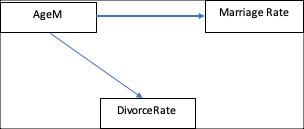


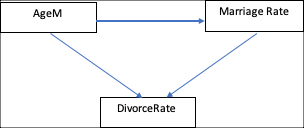

To test this, we will use multiple regression and build three models. Comparing these models, we will test for causal relationships between three variables: the divorce rate $D$, median age at marriage $MedianAgeMarriage$, and marriage rate $Marriage$.

- Divorce rate as a function of median age at marriage $D = \beta_{0} + \beta_{MedianAgeMarriage} \cdot MedianAgeMarriage$


- Divorce rate as a function of marriage rate $D = \beta_{0} + \beta_{Marriage} \cdot Marriage$


- Divorce rate as a function of median age and marriage rate $D = \beta_{0} + \beta_{MedianAgeMarriage} \cdot MedianAgeMarriage + \beta_{Marriage} \cdot Marriage$

Note that these correspond to the arrows in the causal diagrams. Let's run the regressions.

In [11]:
import statsmodels.formula.api as st

In [12]:
# The first model: Divorce Rate is function of Median Age only

mA = st.ols('Divorce ~ MedianAgeMarriage', data=d).fit()
mA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Divorce   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     26.61
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           4.68e-06
Time:                        17:53:00   Log-Likelihood:                -89.378
No. Observations:                  50   AIC:                             182.8
Df Residuals:                      48   BIC:                             186.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.4703      4.421      7.345      0.000      23.581      41.359
MedianAgeMarriage    -0.8744      0.169     -5.159      0.000      -1.215      -0.534
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.412
Skew:                          -0.229   Prob(JB):                        0.494
Kurtosis:                       3.685   Cond. No.                         553.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# The second model: Divorce rate is function of Marriage rate only

mM = st.ols('Divorce ~ Marriage', data=d).fit()
mM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Divorce   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     7.793
Date:                Sun, 15 Aug 2021   Prob (F-statistic):            0.00751
Time:                        17:53:05   Log-Likelihood:                -96.645
No. Observations:                  50   AIC:                             197.3
Df Residuals:                      48   BIC:                             201.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0840      1.313      4.632      0.000       3.443       8.725
Marriage       0.1792      0.064      2.792      0.008       0.050       0.308
==============================================================================
Omnibus:                        0.332   Durbin-Watson:                   1.728
Prob(Omnibus):                  0.847   Jarque-Bera (JB):                0.417
Skew:                           0.179   Prob(JB):                        0.812
Kurtosis:                       2.731   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# The third model: Divorce rate is function of both Median Age and Marriage rate 

mAM = st.ols('Divorce ~ MedianAgeMarriage + Marriage', data=d).fit()
mAM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Divorce   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.42
Date:                Sun, 15 Aug 2021   Prob (F-statistic):           2.46e-05
Time:                        17:53:07   Log-Likelihood:                -89.114
No. Observations:                  50   AIC:                             184.2
Df Residuals:                      47   BIC:                             190.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            36.8766      7.661      4.814      0.000      21.465      52.289
MedianAgeMarriage    -0.9996      0.246     -4.065      0.000      -1.494      -0.505
Marriage             -0.0569      0.081     -0.706      0.484      -0.219       0.105
==============================================================================
Omnibus:                        2.545   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.595
Skew:                          -0.301   Prob(JB):                        0.450
Kurtosis:                       3.635   Cond. No.                     1.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The coefficient values from the third model (divorce rate is a function of both age and marriage rate) are presented graphically below. It can be seen that the marriage rate coefficient is around zero.

<ErrorbarContainer object of 3 artists>

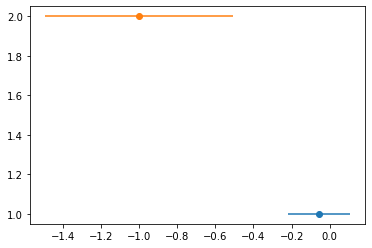

In [15]:
plt.errorbar(-0.0569, 1, xerr=2*0.081,  fmt='o')
plt.errorbar(-0.9996, 2, xerr=2*0.246, fmt='o')

In the last model with two variables ($Marriage$ and $MedianAgeMarriage$), the coefficients for $Marriage$ have very poor statistics and may be dropped from the model. The 95% confidence interval includes zero, and the P-value for this coefficient is 0.484.

Here is the comparison of the coefficients of the three different models:

||$\beta_{MedianAgeMarriage}$|$\beta_{Marriage}$|
|:---|:---:|:---:|
|Model with MedianAgeMarriage|[-1.215, -0.534]||
|Model with Marriage||[0.050, 0.308]|
|Model with MedianAgeMarriage and Marriage|[-1.494, -0.505]|[-0.219, 0.105]|

The coefficient $\beta_{MedianAgeMarriage}$ almost does not move when switching from the model with $MedianAgeMarriage$ only to the model with $MedianAgeMarriage$ and $Marriage$, it only grows a bit more uncertain. The coefficient $\beta_{Marriage}$ however moves closer to zero, indicating that the variable $Marriage$ is only associated with the divorce rate when $MedianAgeMarriage$ is missing form the model.

Once we know the median age at marriage, there is little or no additional predictive power in also knowing the rate of marriage.

This *suggests* that the age of marriage is a confounder in this model &mdash; that both divorce rate and marriage rate depend on age. Also, when we do not condition on the age at marriage variable the divorce rate and marriage rate are associated. Conditioning on age by adding this variable to the regression model, we observe that divorce and marriage rates become independent.

This kind of interplay between causal modeling of dependencies and what the data are telling us that can help us to tease out the causal from the spurious relationships.

## d-separation

We have introduced three simple patterns: the chain, fork, and collider. In general, causal models are not that simple and it is very rare for a graphical model to consist of a single path between variables. In most models, pairs of variables will have multiple possible paths connecting them and there might be a variety of chains, forks, and colliders. We need a criterion or process that can be applied to graphical causals models of any complexity that will allow us to read off what the dependencies and independencies are.

**$d$-separation** is such a process, built upon the rules established for simple patterns. $d$ is for *directional*. This process allows us to determine whether there is a connection path between any pair of nodes (**$d$-connected**) or the pair of nodes is **$d$-separated**, meaning there is no path connecting them. 

Two nodes $X$ and $Y$ are separated if every path between them is *blocked*. There are certain kinds of nodes that can block a path, depending on whether we are performing conditional or unconditional $d$-separation. In we are not conditioning on any variable, then only colliders can block a path. That is, if between two variables we have only chains and/or forks we may "flow" from $X$ to $Y$, but the flow will be blocked at any intervening collider node (unless there is an alternative unblocked path). A collider does not allow dependence to flow between its parents, thus blocking the path. When we condition on a collider or its descendants, the parent node may become dependent.

For non-collider connections, dependence can pass through the node when we do not condition on the connecting node. Conditioning on the node in the middle of a fork or chain will block the dependence flow.

The general definition of $d$-separation is: A path $p$ is blocked by a set of nodes $Z$, if and only if:

1. $p$ contains a chain of nodes $A$ $\rightarrow$ $B$ $\rightarrow$ $C$ or a fork  $A$ $\leftarrow$ $B$ $\rightarrow$ $C$ such that the middle node $B$ is in $Z$ (i.e. $B$ is conditioned on)<br><br>

2. Or, $p$ contains a collider $A$ $\rightarrow$ $B$ $\leftarrow$ $C$ such that the collision node $B$ is not in $Z$, and no descendant of $B$ is in $Z$

This rule helps us to analyze more complex graphical models and determine the dependent and independent variables, both marginally and conditional on other variables.

# Interventions vs. observational studies

In many statistical studies we want to predict the result of an intervention. We're often actually searching for something we can intervene with in order to change an outcome, such as preventing a death. When a study is performed on a new drug we are trying to determine how a patient's illness responds when we intervene by medicating the patient.

In many cases however, a randomized controlled experiment is impractical, impossible, or immoral. If we're studying wildfires or the economy we can't randomize the variables that affect them. In a study of how social media influences teenagers, it would be very difficult to control how much time teenagers spend on social media and nearly impossible to know whether we are controlling them effectively or not. It would be immoral to give sick people placebos to test a new medicine when a helpful treatment already exists. In cases where randomized controlled experiments are not practical, we have no choice but to work with observational studies in which we have to accept uncontrolled data and use regression as we've seen to try to suss out the causal effects.  Under the right conditions, though, we may be able to determine the effect of an intervention without actually doing it.  We'll meet the adjustment rule soon, which can do this work for us if certain preconditions are met.

## The effect of interventions

There is a big difference between intervening on a variable and merely conditioning on it. When we intervene on a variable in a model, we force it to take a specific value. As a result, we change the system that we are studying and the values of other variables often change as well. Conditioning on a variable does not involve an interaction with the system, just the subsetting of dataset observations filtered to those in which the variable has the value of interest.

Let's look at the often-cited example that an increase in ice cream sales is correlated with an increase in violent crime. This is not because ice cream causes crime, but because both ice cream sales and violent crimes are more common in hot weather. We saw in the last module that to avoid spurious correlation ideally we want to use a randomized controlled experiment (RCT). This way all factors that might influence the outcome variable are either static or vary at random, except for one. This way we can relate any change in the outcome variable to that one input variable.

Here's the model for ice cream and violent crime:

$$IceCreamSales \leftarrow Temperature \rightarrow CrimeRate$$

If we were to intervene to reduce ice cream sales by shutting down all the ice cream shops we would be effectively modifying the graphical model to remove one of the edges: 

$$IceCreamSales  \space\space\space\space Temperature \rightarrow CrimeRate$$

From this graph, we see that crime rates are now totally independent of ice cream sales since the latter is no longer associated with $Temperature$. If we did this experiment, we would find that $Temperature$ and $CrimeRate$ are still correlated and relatively unchanged even though $IceCreamSales$ is now zero. Even if we vary the level at which we hold variable $IceCreamSales$ constant, this variation will not be transmitted to variable $CrimeRate$. Intervening on a variable results in a totally different pattern of dependencies &mdash; it changes the structure of the causal graph.

We identify that we are doing an intervention by using the $do$-operator, to distinguish between cases where a variable $X$ takes a value $x$ naturally and cases where we fix $X=x$ by denoting $do(X=x)$.
While $P(Y=y|X=x)$ is the probability that $Y=y$ conditional on *finding* $X=x$, $P(Y=y|do(X=x))$ is the probability that $Y=y$ when we *intervene* to make $X=x$. 

## The adjustment formula

The ice cream example represents an extreme case in which the correlation between the two variables was totally spurious from a causal perspective. This will be true for any causal graph where there is no path between them, $X$ to $Y$. But so clear-cut situations are very rare. In more realistic situations, there will be a path from $X \rightarrow Y$ where another variable $Z$ directly influences both $X$ and $Y$: $Z \rightarrow X$ and $Z \rightarrow Y$ such that $Y$ responds to both $Z$ and $X$. Such a diagram could represent the story in Simpson's paradox: $X$ stands for drug usage, $Y$ stands for recovery, and $Z$ stands for gender. Gender influences both drug usage and recovery, and drug usage is expected to change the probability of recovery. To find out how effective the drug is in the population, we imagine a hypothetical intervention by which we administer the drug uniformly to the entire population and compare the recovery rate to what we would obtain in an intervention where no one used the drug. Let's call the first intervention $do(X=1)$ and the second $do(X=0)$ (using 1 and 0 for *true* and *false*). Our task is to estimate the difference in the probability of recovery:


$$P(Y=1|do(X=1)) - P(Y=1|do(X=0))$$


This expression is known as the **causal effect difference**, or **average causal effect (ACE)**.
By fixing the value of $X$ we break the edge $Z \rightarrow X$ and the so called **manipulative probability** may be computed as follows:


$$P(Y=y|do(X=x)) = P_{m}(Y=y|X=x)$$


$$=\sum_{z}P_{m}(Y=y|X=x,Z=z)P_{m}(Z=Z|X=x)$$ where the summing is over all values of $Z=z$

The intervention that we are interested in would change the causal model so $Z$ not longer affects $Y$.  In this case $Z$ and $X$ would be $d$-separated.  This allows us to take an additional step:


$$=\sum_{z}P_{m}(Y=y|X=x,Z=z)P_{m}(Z=z)$$


This gives us a formula for the causal effect in terms of the pre-intervention probabilities:


$$P(Y=y|do(X=x)) = \sum_{z}P(Y=y|X=x,Z=z)P(Z=z) $$

We've removed the $do$ operator, so we can calculate the estimate of the effect of an intervention for this model without actually doing the intervention.  The fact we can do this with this model is critically dependent on the d-separation between $Z$ and $Y$.

This we call the **adjustment formula**. It computes the association between $X$ and $Y$ for each value $z$ of $Z$, then averages over those values. This procedure is referred to as *adjusting for $Z$* or *controlling for $Z$*.

To demonstrate the application of the adjustment formula, let's apply it to Simpson's paradox. 

$X=1$ stands for the patients taking drug, $Z=1$ stands for the patient being male, and $Y=1$ for the patient recovering.


$$P(Y=1|do(X=1))=P(Y=1|X=1,Z=1)P(Z=1) + P(Y=1|X=1,Z=0)P(Z=0)$$


Substituting the figures given in the table we obtain:


$$P(Y=1|do(X=1)) = \frac{0.93(87+270)}{700}+\frac{0.73(263+80)}{700} = 0.832$$


and similarly


$$P(Y=1|do(X=0)) =\frac{0.87(87+270)}{700} + \frac{0.69(263+80)}{700} = 0.7818$$



**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments.

# References

- Pearl, J., Mackenzie, D., (2018). *The Book of Why. The New Science of Cause and Effect*. Basic Books.


- Pearl, J., Glymour, M., Jewell, N. P., (2016). *Causal Inference in Statistics: A Primer.* Wiley.  